In [1]:
### Data Collection
import pandas_datareader as pdr

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key = 'eedfe43092b5b2959a639721de799515b14a22ca')

c:\python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-30 00:00:00+00:00,106.00,106.5000,105.50,105.80,24863945,24.848285,24.965494,24.731076,24.801401,99455780,0.0,1.0
1,AAPL,2016-08-31 00:00:00+00:00,106.10,106.5699,105.64,105.66,29662406,24.871727,24.981880,24.763894,24.768583,118649624,0.0,1.0
2,AAPL,2016-09-01 00:00:00+00:00,106.73,106.8000,105.62,106.14,26701523,25.019410,25.035819,24.759206,24.881103,106806092,0.0,1.0
3,AAPL,2016-09-02 00:00:00+00:00,107.73,108.0000,106.82,107.70,26802450,25.253828,25.317120,25.040507,25.246795,107209800,0.0,1.0
4,AAPL,2016-09-06 00:00:00+00:00,107.70,108.3000,107.51,107.90,26880391,25.246795,25.387446,25.202256,25.293679,107521564,0.0,1.0


In [6]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-08-23 00:00:00+00:00,149.71,150.19,147.89,148.31,60131810,149.71,150.19,147.89,148.31,60131810,0.0,1.0
1254,AAPL,2021-08-24 00:00:00+00:00,149.62,150.86,149.15,149.45,48606428,149.62,150.86,149.15,149.45,48606428,0.0,1.0
1255,AAPL,2021-08-25 00:00:00+00:00,148.36,150.32,147.80,149.81,58991297,148.36,150.32,147.80,149.81,58991297,0.0,1.0
1256,AAPL,2021-08-26 00:00:00+00:00,147.54,149.12,147.51,148.35,48597195,147.54,149.12,147.51,148.35,48597195,0.0,1.0
1257,AAPL,2021-08-27 00:00:00+00:00,148.60,148.75,146.83,147.48,55802388,148.60,148.75,146.83,147.48,55802388,0.0,1.0


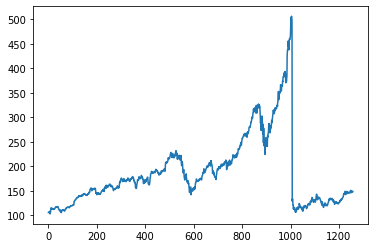

In [7]:
import matplotlib.pyplot as plt
plt.plot(df.reset_index()['close'])

In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1258,)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.0071223 ],
       [0.00737046],
       [0.00893389],
       ...,
       [0.11224439],
       [0.11020945],
       [0.11283998]])

In [13]:
## Splitting the dataset into train and test split
training_size = int(len(df1)*0.65)
testing_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [14]:
training_size, testing_size

(817, 441)

In [15]:
### Data Preprocessing
def create_dataset(dataset, time_step = 1):
    dataX, datay = [],[]
    for i in range(len(dataset)-time_step -1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        datay.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(datay)

In [16]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(X_train)

[[0.0071223  0.00737046 0.00893389 ... 0.04131924 0.0418652  0.04206373]
 [0.00737046 0.00893389 0.01141553 ... 0.0418652  0.04206373 0.04179075]
 [0.00893389 0.01141553 0.01134108 ... 0.04206373 0.04179075 0.04653067]
 ...
 [0.24717094 0.25134008 0.25089339 ... 0.40691384 0.40490371 0.39721064]
 [0.25134008 0.25089339 0.2404457  ... 0.40490371 0.39721064 0.39428231]
 [0.25089339 0.2404457  0.2434733  ... 0.39721064 0.39428231 0.39371153]]


In [18]:
print(y_train)

[0.04179075 0.04653067 0.04667957 0.04670439 0.04591026 0.04521541
 0.06357951 0.06303355 0.06439845 0.06740123 0.07047846 0.07174409
 0.07268712 0.07194262 0.07484614 0.07913937 0.08035537 0.0799459
 0.08087651 0.08330852 0.08432599 0.08288664 0.08320925 0.08387929
 0.08402819 0.09097677 0.08891701 0.09095196 0.08986004 0.09030673
 0.08901628 0.08822216 0.08936371 0.08951261 0.08899146 0.09263947
 0.09321024 0.0914731  0.0951211  0.09110085 0.09502184 0.09378102
 0.09308616 0.09368176 0.10092813 0.10172226 0.10125074 0.1005807
 0.10067997 0.10333532 0.10147409 0.1005807  0.09978658 0.0993647
 0.09554298 0.09596486 0.09410363 0.09603931 0.09447588 0.09318543
 0.09755311 0.09713123 0.10053107 0.10273973 0.10063034 0.10090332
 0.10055589 0.10782708 0.110135   0.10901826 0.107703   0.11373337
 0.123784   0.126216   0.12440441 0.12611674 0.13145225 0.1304596
 0.12988882 0.11693468 0.12261763 0.12390808 0.126216   0.12574449
 0.12460294 0.12591821 0.12527298 0.12542188 0.12316359 0.12420588

In [19]:
# LSTM take input in 3 dimension
# reshape input to be  [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0] ,X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0] ,X_test.shape[1], 1)

In [20]:
# Create the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [22]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs = 100, batch_size = 64, verbose =1)

Epoch 1/100
12/12 [==============================] - 17s 551ms/step - loss: 0.0169 - val_loss: 0.0377
Epoch 2/100
12/12 [==============================] - 4s 303ms/step - loss: 0.0025 - val_loss: 0.0258
Epoch 3/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0012 - val_loss: 0.0227
Epoch 4/100
12/12 [==============================] - 3s 282ms/step - loss: 7.7080e-04 - val_loss: 0.0220
Epoch 5/100
12/12 [==============================] - 3s 280ms/step - loss: 5.3741e-04 - val_loss: 0.0235
Epoch 6/100
12/12 [==============================] - 3s 281ms/step - loss: 5.1333e-04 - val_loss: 0.0223
Epoch 7/100
12/12 [==============================] - 4s 314ms/step - loss: 4.9285e-04 - val_loss: 0.0210
Epoch 8/100
12/12 [==============================] - 4s 301ms/step - loss: 5.6600e-04 - val_loss: 0.0212
Epoch 9/100
12/12 [==============================] - 3s 291ms/step - loss: 4.6377e-04 - val_loss: 0.0212
Epoch 10/100
12/12 [==============================] - 4s 309ms/ste

12/12 [==============================] - 4s 296ms/step - loss: 1.7421e-04 - val_loss: 0.0108
Epoch 79/100
12/12 [==============================] - 4s 296ms/step - loss: 1.8713e-04 - val_loss: 0.0120
Epoch 80/100
12/12 [==============================] - 4s 297ms/step - loss: 1.7042e-04 - val_loss: 0.0117
Epoch 81/100
12/12 [==============================] - 4s 296ms/step - loss: 1.6734e-04 - val_loss: 0.0136
Epoch 82/100
12/12 [==============================] - 4s 295ms/step - loss: 1.6240e-04 - val_loss: 0.0112
Epoch 83/100
12/12 [==============================] - 4s 297ms/step - loss: 1.6023e-04 - val_loss: 0.0135
Epoch 84/100
12/12 [==============================] - 4s 310ms/step - loss: 1.6428e-04 - val_loss: 0.0117
Epoch 85/100
12/12 [==============================] - 3s 291ms/step - loss: 1.4500e-04 - val_loss: 0.0154
Epoch 86/100
12/12 [==============================] - 3s 295ms/step - loss: 1.7199e-04 - val_loss: 0.0109
Epoch 87/100
12/12 [==============================] - 4s 29

In [23]:
# Let's do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [24]:
## Transform Back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

182.78358967310746

In [26]:
math.sqrt(mean_squared_error(y_test, test_predict))

233.62256609552568

No handles with labels found to put in legend.


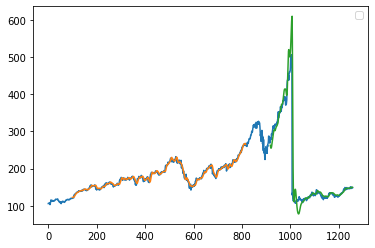

In [27]:
### Ploting
# SHift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()

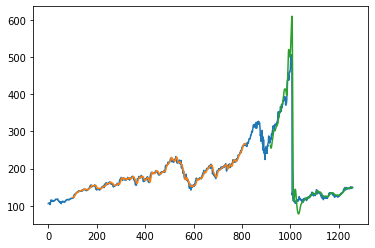

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

441

In [30]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [31]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [32]:
lst_output = []
n_steps = 100
i = 0
while(i<30):
    if (len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(f"{i} day output {yhat}")
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat[0].tolist())
        i += 1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat[0].tolist())
        i+=1
print(lst_output)

[0.11503898]
1 day output [[0.11501665]]
2 day output [[0.11520089]]
3 day output [[0.11555946]]
4 day output [[0.11603727]]
5 day output [[0.11658271]]
6 day output [[0.11715781]]
7 day output [[0.11773856]]
8 day output [[0.11831201]]
9 day output [[0.11887231]]
10 day output [[0.11941759]]
11 day output [[0.11994772]]
12 day output [[0.12046365]]
13 day output [[0.12096631]]
14 day output [[0.12145691]]
15 day output [[0.12193661]]
16 day output [[0.12240671]]
17 day output [[0.12286856]]
18 day output [[0.12332335]]
19 day output [[0.12377247]]
20 day output [[0.12421706]]
21 day output [[0.12465831]]
22 day output [[0.12509704]]
23 day output [[0.12553406]]
24 day output [[0.12596993]]
25 day output [[0.12640512]]
26 day output [[0.12683983]]
27 day output [[0.12727427]]
28 day output [[0.12770842]]
29 day output [[0.12814224]]
[0.11503898352384567, 0.11501665413379669, 0.11520089209079742, 0.11555945873260498, 0.1160372719168663, 0.1165827140212059, 0.11715780943632126, 0.1177385

In [33]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [34]:
len(df1)

1258

In [35]:
df3 = df1.tolist()
df3.extend(lst_output)

ValueError: Expected 2D array, got 1D array instead:
array=[0.11503898 0.11501665 0.11520089 0.11555946 0.11603727 0.11658271
 0.11715781 0.11773856 0.11831201 0.11887231 0.11941759 0.11994772
 0.12046365 0.12096631 0.12145691 0.12193661 0.12240671 0.12286856
 0.12332335 0.12377247 0.12421706 0.12465831 0.12509704 0.12553406
 0.12596993 0.12640512 0.12683983 0.12727427 0.12770842 0.12814224].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

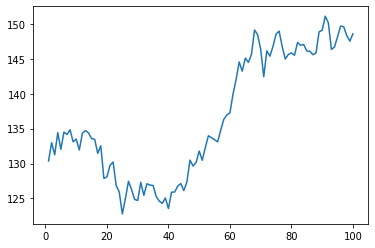

In [36]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))